<a href="https://colab.research.google.com/github/comparativechrono/computational_biology_notebooks/blob/main/cobwebbing_worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Course:` **Mathematical & Computational Biology**  
`Module:` Cobwebbing  
`Author:` Tim Hearn  
`License:` CC-BY-4.0

# Cobwebbing for Discrete‑Time Dynamical Systems
A tutorial Jupyter notebook


## 1 · Overview  
This notebook walks through **cobweb diagrams**‑–a graphical tool for analysing one‑dimensional, discrete‑time maps  
$$
x_{t+1} = f(x_t)
$$

You will:  
1. Review the theory from first principles (fixed points, stability, linearisation)  
2. Learn how to program cobweb plots in Python/Matplotlib  
3. Explore three worked examples: a linear map, the Beverton–Holt model, and the logistic map  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['axes.grid'] = True


In [2]:
def iterate_map(f, x0, n):
    """Return list of n+1 iterates starting at x0"""
    xs = [x0]
    for _ in range(n):
        xs.append(f(xs[-1]))
    return xs

def cobweb_plot(f, x0, n, xmin, xmax, samples=400, ax=None, title=None):
    """Draw a cobweb diagram for n steps starting at x0 on [xmin,xmax]."""
    if ax is None:
        fig, ax = plt.subplots()
    xs = np.linspace(xmin, xmax, samples)
    ax.plot(xs, f(xs), 'k', label='$y=f(x)$')
    ax.plot(xs, xs, 'k--', label='$y=x$')
    # draw cobweb
    x = x0
    for i in range(n):
        y = f(x)
        ax.plot([x, x], [x, y], 'C1')
        ax.plot([x, y], [y, y], 'C1')
        x = y
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    if title:
        ax.set_title(title)
    ax.legend()
    return ax


## 2 · Example 1 – A linear map  

Consider the simple map  
$$
x_{t+1} = a\, x_t.
$$

*Fixed point:* $\bar x=0$.  
*Stability:* $|a|<1$ (convergent), $|a|>1$ (divergent), $a<0$ causes sign oscillations.  


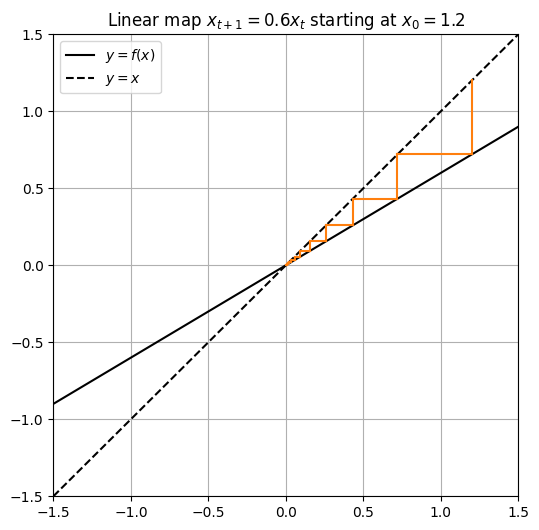

In [3]:
a = 0.6      # try changing to 1.2 or -0.8
f = lambda x: a*x
x0 = 1.2
cobweb_plot(f, x0, n=15, xmin=-1.5, xmax=1.5,
            title=f"Linear map $x_{{t+1}}={a}x_t$ starting at $x_0={x0}$")
plt.show()


## 3 · Example 2 – Beverton–Holt density dependence  

$$
x_{t+1} = \frac{R\, x_t}{1 + x_t}, \qquad R > 0.
$$


*Fixed points:* $x=0$ and $x=R-1$.  
*Jacobian:* $J=\dfrac{R}{(1+x)^2}$.  
*Stability:*  
* at $x=0$: stable if $R<1$  
* at $x=R-1$: stable if $R>1$  

(Compare with the lecture slide “Non‑linear systems in one dimension – Beverton Holt model”.)  


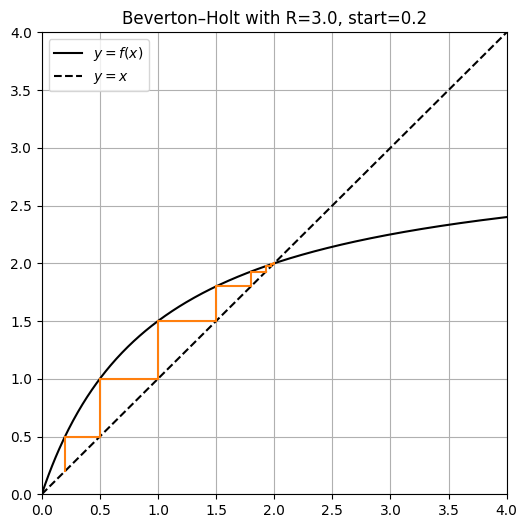

In [4]:
R = 3.0
f = lambda x: R*x/(1+x)
x0 = 0.2
cobweb_plot(f, x0, n=25, xmin=0, xmax=4,
            title=f"Beverton–Holt with R={R}, start={x0}")
plt.show()


## 4 · Example 3 – Logistic map  

$$
x_{t+1} = r\, x_t (1 - x_t), \qquad 0 < r \le 4.
$$


This classic model exhibits a rich spectrum of behaviour as $r$ varies. Below we visualise two regimes:  

* $r=2.8$ (convergent)  
* $r=3.5$ (period‑2 oscillation)  


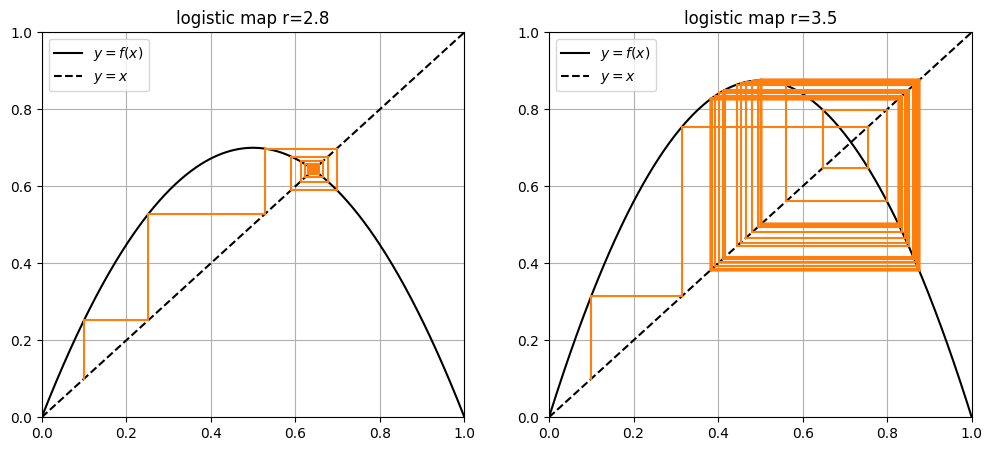

In [5]:
def logistic(r):
    return lambda x: r*x*(1-x)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
for ax, r in zip(axes.flat, [2.8, 3.5]):
    f = logistic(r)
    cobweb_plot(f, x0=0.1, n=100, xmin=0, xmax=1,
                ax=ax, title=f"logistic map r={r}")
plt.show()


## 5 · Key take‑aways  

* **Cobweb diagrams** are a simple visual way to see how one‑dimensional maps iterate.  
* Stability is decided by the slope $J=f'(\bar x)$ at a fixed point: $|J|<1$ ⇒ attraction.  
* Linear maps converge or diverge monotonically or with sign flips.  
* Non‑linear maps like Beverton–Holt can be analysed the same way and illustrate density‑dependent saturation.  
* The logistic map shows how changing a parameter can lead from convergence to periodicity and chaos.  
